Remove StandardHours and OVer18 columns because all the values are same.
Remove BusinessTravel as 71% of employees travel rarely.
Remove Daily Rate, Hourly Rate and Monthly Rate because these are all derived attributes to reduce multi-collinearity(dimensionality reduction).
Remove EmployeeCount as the value is 1 for all.

Education
1 'Below College'
2 'College'
3 'Bachelor'
4 'Master'
5 'Doctor'

EnvironmentSatisfaction
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

JobInvolvement
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

JobSatisfaction
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

PerformanceRating
1 'Low'
2 'Good'
3 'Excellent'
4 'Outstanding'

RelationshipSatisfaction
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

WorkLifeBalance
1 'Bad'
2 'Good'
3 'Better'
4 'Best'

MaritialStatus
1 'Single'
2 'Married'
3 'Divorced'

Gender
1 'Male'
2 'Female'

JobRole
1 'Sales Executive'
2 'Research Scientist'
3 'Laboratory Technician'
4 'Manufacturing Director'
5 'Healthcare Representative'
6 'Manager'
7 'Sales Representative'
8 'Research Director'
9 'Human Resources'

OverTime
1 'Yes'
2 'No'

Department
1 'Sales'
2 'Research & Development'
3 'Human Resources'

Attrition
1 'Yes'
2 'No'

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('D:\Data-Analytics-Mini-Project\hr_dataset.csv')

In [3]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
data.shape

(1470, 35)

In [6]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


<AxesSubplot:>

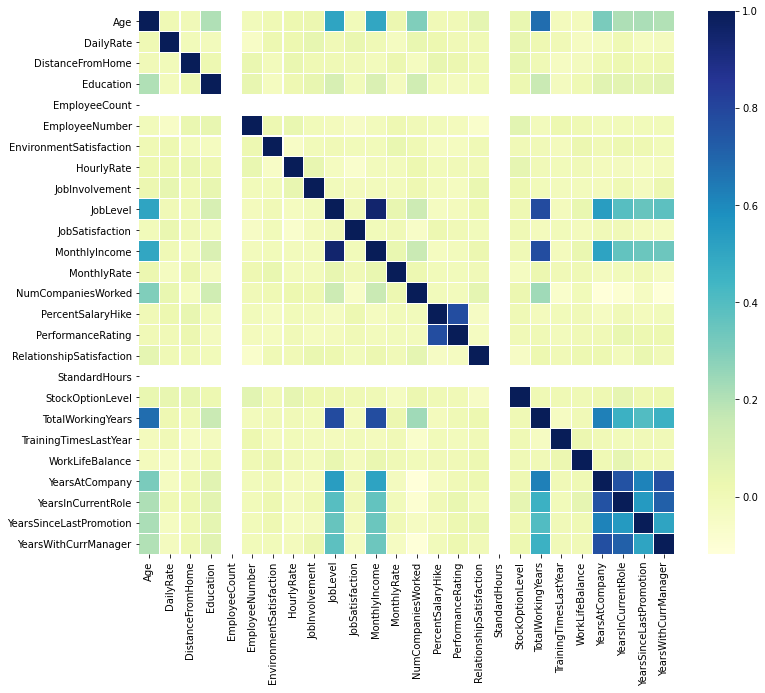

In [7]:
corrmat = data.corr()
  
f, ax = plt.subplots(figsize =(12, 10))
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1)

In [8]:
data.JobRole.unique()

array(['Sales Executive', 'Research Scientist', 'Laboratory Technician',
       'Manufacturing Director', 'Healthcare Representative', 'Manager',
       'Sales Representative', 'Research Director', 'Human Resources'],
      dtype=object)

In [9]:
data.Department.unique()

array(['Sales', 'Research & Development', 'Human Resources'], dtype=object)

In [10]:
data.Over18.unique()

array(['Y'], dtype=object)

In [11]:
data.Attrition.value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [12]:
data.BusinessTravel.value_counts()

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

In [13]:
data.EmployeeCount.value_counts()

1    1470
Name: EmployeeCount, dtype: int64

In [14]:
df=data.drop(columns=['Over18','StandardHours','EmployeeCount','BusinessTravel','DailyRate','MonthlyRate','HourlyRate'])

In [15]:
df.describe()

,Age,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,9.192517,2.912925,1024.865306,2.721769,2.729932,2.063946,2.728571,6502.931293,2.693197,...,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,8.106864,1.024165,602.024335,1.093082,0.711561,1.106940,1.102846,4707.956783,2.498009,...,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1009.000000,0.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,2.000000,2.000000,491.250000,2.000000,2.000000,1.000000,2.000000,2911.000000,1.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,7.000000,3.000000,1020.500000,3.000000,3.000000,2.000000,3.000000,4919.000000,2.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,14.000000,4.000000,1555.750000,4.000000,3.000000,3.000000,4.000000,8379.000000,4.000000,...,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,29.000000,5.000000,2068.000000,4.000000,4.000000,5.000000,4.000000,19999.000000,9.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   Department                1470 non-null   object
 3   DistanceFromHome          1470 non-null   int64 
 4   Education                 1470 non-null   int64 
 5   EducationField            1470 non-null   object
 6   EmployeeNumber            1470 non-null   int64 
 7   EnvironmentSatisfaction   1470 non-null   int64 
 8   Gender                    1470 non-null   object
 9   JobInvolvement            1470 non-null   int64 
 10  JobLevel                  1470 non-null   int64 
 11  JobRole                   1470 non-null   object
 12  JobSatisfaction           1470 non-null   int64 
 13  MaritalStatus             1470 non-null   object
 14  MonthlyIncome           

In [17]:
df.to_csv('final_dataset.csv')

In [17]:
df.head()

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Sales,1,2,Life Sciences,1,2,Female,3,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Research & Development,8,1,Life Sciences,2,3,Male,2,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Research & Development,2,2,Other,4,4,Male,2,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Research & Development,3,4,Life Sciences,5,4,Female,3,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Research & Development,2,1,Medical,7,1,Male,3,...,3,4,1,6,3,3,2,2,2,2


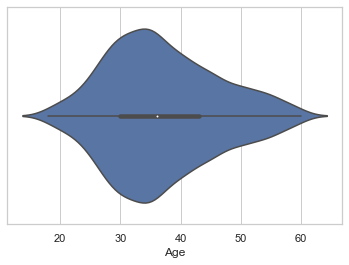

In [18]:
sns.set_theme(style="whitegrid")
age_vplot = sns.violinplot(x=df["Age"])

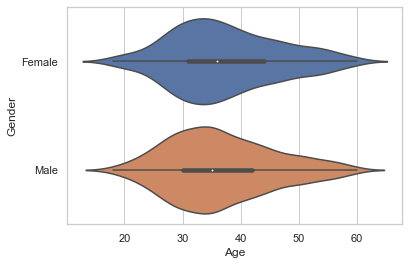

In [19]:
sns.set_theme(style="whitegrid")
age_gen_vplot = sns.violinplot(x=df["Age"], y=df["Gender"])

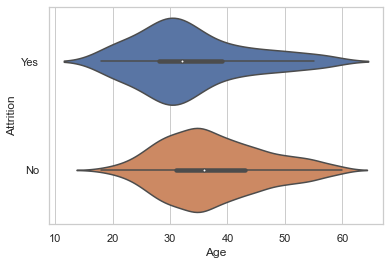

In [20]:
sns.set_theme(style="whitegrid")
age_gen_vplot = sns.violinplot(x=df["Age"], y=df["Attrition"])

<AxesSubplot:xlabel='Attrition', ylabel='Age'>

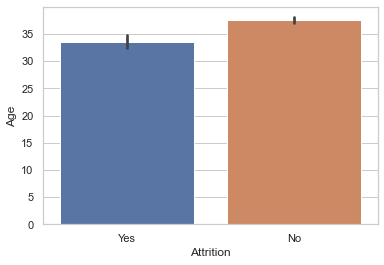

In [21]:
sns.barplot(x = 'Attrition',y = 'Age',data = df)

In [22]:
df.Gender.value_counts()

Male      882
Female    588
Name: Gender, dtype: int64

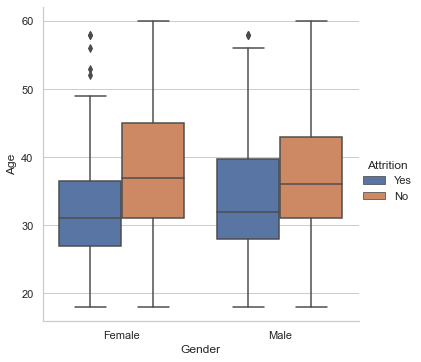

In [23]:
sns.catplot(x="Gender", y="Age", hue="Attrition", kind="box", data=df)
#add swarmplot

C:\Users\anish\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 17.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


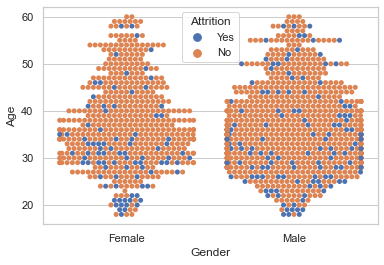

In [29]:
ax = sns.swarmplot(x="Gender", y="Age", hue="Attrition",data=df,edgecolor="gray")

In [30]:
new_df = pd.get_dummies(df, columns = ['Gender'])

In [31]:
new_df = new_df.rename(columns = {'Gender_Female': 'Gender'}, inplace = False)

In [32]:
new_df.head()

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,JobInvolvement,JobLevel,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Gender,Gender_Male
0,41,Yes,Sales,1,2,Life Sciences,1,2,3,2,...,0,8,0,1,6,4,0,5,1,0
1,49,No,Research & Development,8,1,Life Sciences,2,3,2,2,...,1,10,3,3,10,7,1,7,0,1
2,37,Yes,Research & Development,2,2,Other,4,4,2,1,...,0,7,3,3,0,0,0,0,0,1
3,33,No,Research & Development,3,4,Life Sciences,5,4,3,1,...,0,8,3,3,8,7,3,0,1,0
4,27,No,Research & Development,2,1,Medical,7,1,3,1,...,1,6,3,3,2,2,2,2,0,1


In [33]:
# new_df=new_df.drop(columns=["Gender_Male"],axis=1)

In [34]:
# new_df.head()

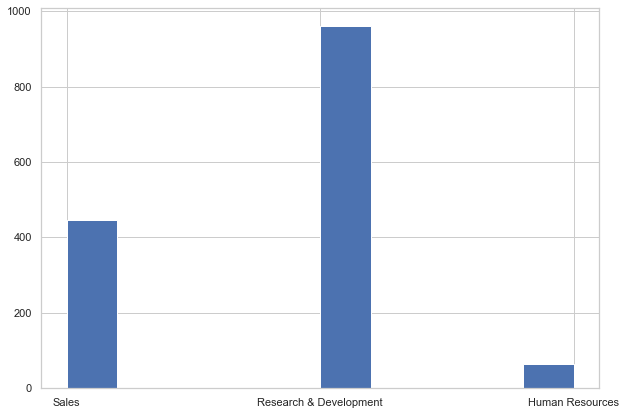

In [35]:
fig = plt.figure(figsize =(10, 7))
plt.hist(df["Department"])
plt.show()

In [36]:
(df.groupby(["Department","Gender"]).count()["Age"])

Department              Gender
Human Resources         Female     20
                        Male       43
Research & Development  Female    379
                        Male      582
Sales                   Female    189
                        Male      257
Name: Age, dtype: int64

In [37]:
new_df= pd.get_dummies(new_df, columns = ['Department'])

In [38]:
new_df.head()

,Age,Attrition,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobRole,...,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Gender,Gender_Male,Department_Human Resources,Department_Research & Development,Department_Sales
0,41,Yes,1,2,Life Sciences,1,2,3,2,Sales Executive,...,1,6,4,0,5,1,0,0,0,1
1,49,No,8,1,Life Sciences,2,3,2,2,Research Scientist,...,3,10,7,1,7,0,1,0,1,0
2,37,Yes,2,2,Other,4,4,2,1,Laboratory Technician,...,3,0,0,0,0,0,1,0,1,0
3,33,No,3,4,Life Sciences,5,4,3,1,Research Scientist,...,3,8,7,3,0,1,0,0,1,0
4,27,No,2,1,Medical,7,1,3,1,Laboratory Technician,...,3,2,2,2,2,0,1,0,1,0


In [39]:
# new_df=new_df.drop(columns=["Department_Sales",],axis=1) 
# #00-sales 01-r&d 10-hr
# new_df.head()

In [40]:
du=(df.groupby(["Department","Gender"]).count()["Age"]/df.groupby(["Department"]).count()["Age"])
du=du.to_frame()
du=du.rename(columns = {'Age': 'Count'}, inplace = False)
du

Count
Department             Gender          
Human Resources        Female  0.317460
                       Male    0.682540
Research & Development Female  0.394381
                       Male    0.605619
Sales                  Female  0.423767
                       Male    0.576233

<AxesSubplot:xlabel='Department,Gender'>

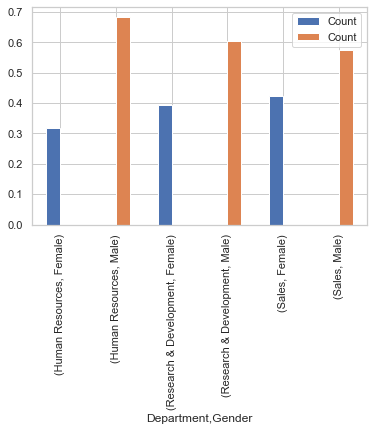

In [41]:
pd.concat(
    [du.iloc[::2], du.iloc[1::2]],
    axis=1).plot.bar()

In [42]:
du=(df.groupby(["Department","Attrition"]).count()["Age"]/df.groupby(["Department"]).count()["Age"])
du=du.to_frame()
du=du.rename(columns = {'Age': 'Count'}, inplace = False)
du

Count
Department             Attrition          
Human Resources        No         0.809524
                       Yes        0.190476
Research & Development No         0.861602
                       Yes        0.138398
Sales                  No         0.793722
                       Yes        0.206278

<AxesSubplot:xlabel='Department,Attrition'>

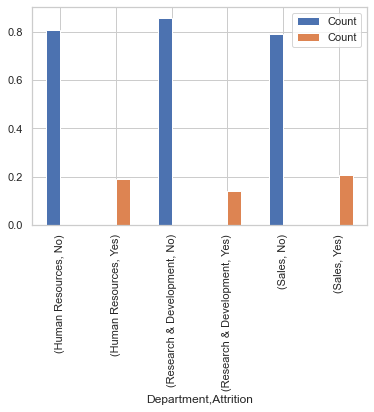

In [43]:
pd.concat(
    [du.iloc[::2], du.iloc[1::2]],
    axis=1).plot.bar()

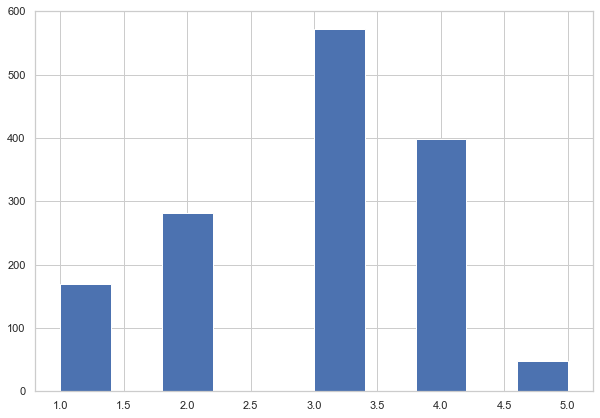

In [44]:
fig = plt.figure(figsize =(10, 7))
plt.hist(df["Education"])
plt.show()

In [45]:
du=(df.groupby(["Education","Gender"]).count()["Age"]/df.groupby(["Education"]).count()["Age"])
du=du.to_frame()
du=du.rename(columns = {'Age': 'Count'}, inplace = False)
du

Count
Education Gender          
1         Female  0.352941
          Male    0.647059
2         Female  0.414894
          Male    0.585106
3         Female  0.410839
          Male    0.589161
4         Female  0.386935
          Male    0.613065
5         Female  0.458333
          Male    0.541667

<AxesSubplot:xlabel='Education,Gender'>

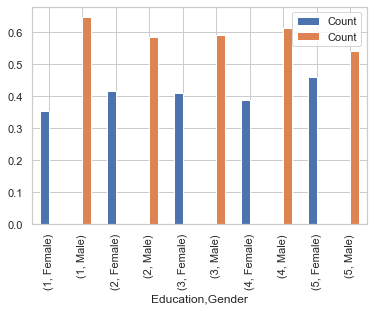

In [46]:
female=du.iloc[::2]
male=du.iloc[1::2]
pd.concat(
    [du.iloc[::2], du.iloc[1::2]],
    axis=1).plot.bar()


In [47]:
du=(df.groupby(["Education","Attrition"]).count()["Age"]/df.groupby(["Education"]).count()["Age"])
du=du.to_frame()
du=du.rename(columns = {'Age': 'Count'}, inplace = False)
du

Count
Education Attrition          
1         No         0.817647
          Yes        0.182353
2         No         0.843972
          Yes        0.156028
3         No         0.826923
          Yes        0.173077
4         No         0.854271
          Yes        0.145729
5         No         0.895833
          Yes        0.104167

<AxesSubplot:xlabel='Education,Attrition'>

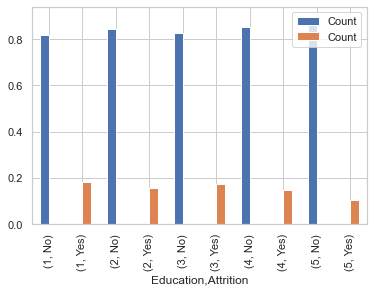

In [48]:
pd.concat(
    [du.iloc[::2], du.iloc[1::2]],
    axis=1).plot.bar()

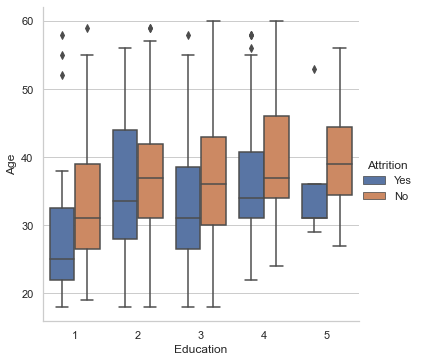

In [49]:
sns.catplot(x="Education", y="Age", hue="Attrition", kind="box", data=df)

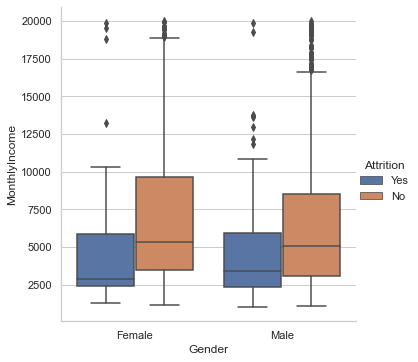

In [51]:
sns.catplot(x="Gender", y="MonthlyIncome", hue="Attrition", kind="box", data=df)
#add swarmplot

Relate age, education, attrition with salary

In [39]:
df.EducationField.unique()


array(['Life Sciences', 'Other', 'Medical', 'Marketing',
       'Technical Degree', 'Human Resources'], dtype=object)

(array([606.,   0.,  82.,   0., 464.,   0., 159.,   0., 132.,  27.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

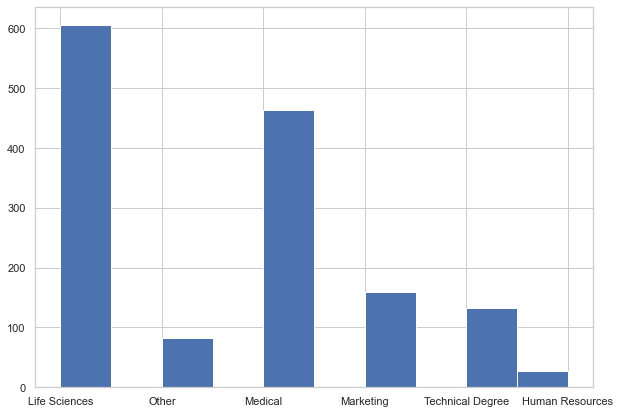

In [41]:
fig = plt.figure(figsize =(10, 7))
plt.hist(df["EducationField"])

In [74]:
du=(df.groupby(["EducationField","Education"]).count()["Age"]/df.groupby(["EducationField"]).count()["Age"])
du=du.to_frame()
du=du.rename(columns = {'Age': 'Count'}, inplace = False)
du

Count
EducationField   Education          
Human Resources  1          0.074074
                 2          0.074074
                 3          0.592593
                 4          0.185185
                 5          0.074074
Life Sciences    1          0.110561
                 2          0.191419
                 3          0.384488
                 4          0.285479
                 5          0.028053
Marketing        1          0.088050
                 2          0.150943
                 3          0.371069
                 4          0.327044
                 5          0.062893
Medical          1          0.135776
                 2          0.213362
                 3          0.394397
                 4          0.224138
                 5          0.032328
Other            1          0.060976
                 2          0.231707
                 3          0.292683
                 4          0.402439
                 5          0.012195
Technical Degree 1          0.143939
                 2          0.166667
                 3          0.431818
                 4          0.234848
                 5          0.022727

<AxesSubplot:xlabel='EducationField,Education'>

<Figure size 720x504 with 0 Axes>

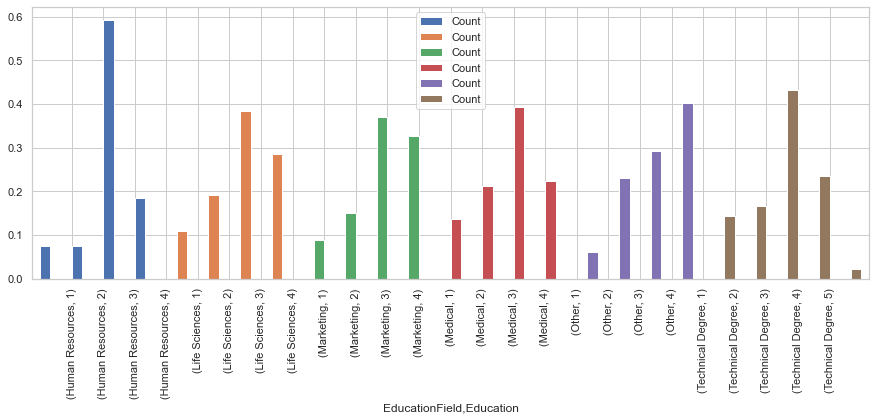

In [76]:
fig = plt.figure(figsize =(10, 7))
pd.concat(
    [du.iloc[0:4:], du.iloc[5:9:],du.iloc[10:14:],du.iloc[15:19:],du.iloc[20:24:],du.iloc[25::]],
    axis=1).plot.bar(figsize=(15,5), width=2)


In [79]:
du=(df.groupby(["EducationField","Attrition"]).count()["Age"]/df.groupby(["EducationField"]).count()["Age"])
du=du.to_frame()
du=du.rename(columns = {'Age': 'Count'}, inplace = False)
du

Count
EducationField   Attrition          
Human Resources  No         0.740741
                 Yes        0.259259
Life Sciences    No         0.853135
                 Yes        0.146865
Marketing        No         0.779874
                 Yes        0.220126
Medical          No         0.864224
                 Yes        0.135776
Other            No         0.865854
                 Yes        0.134146
Technical Degree No         0.757576
                 Yes        0.242424

<AxesSubplot:xlabel='EducationField,Attrition'>

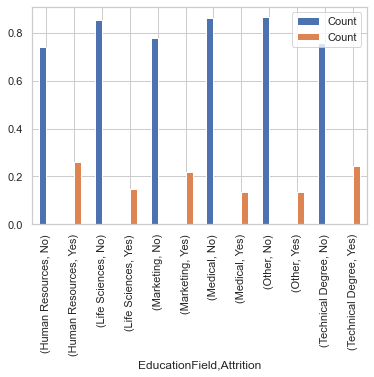

In [82]:
pd.concat(
    [du.iloc[::2], du.iloc[1::2]],
    axis=1).plot.bar()

#educationfield vs jobRole

In [83]:
df.EnvironmentSatisfaction.unique()

array([2, 3, 4, 1], dtype=int64)

In [87]:
du=(df.groupby(["Department","EnvironmentSatisfaction"]).count()["Age"]/df.groupby(["Department"]).count()["Age"])
du=du.to_frame()
du=du.rename(columns = {'Age': 'Count'}, inplace = False)
du

Count
Department             EnvironmentSatisfaction          
Human Resources        1                        0.174603
                       2                        0.190476
                       3                        0.412698
                       4                        0.222222
Research & Development 1                        0.194589
                       2                        0.184183
                       3                        0.303850
                       4                        0.317378
Sales                  1                        0.192825
                       2                        0.219731
                       3                        0.302691
                       4                        0.284753

<AxesSubplot:xlabel='Department,EnvironmentSatisfaction'>

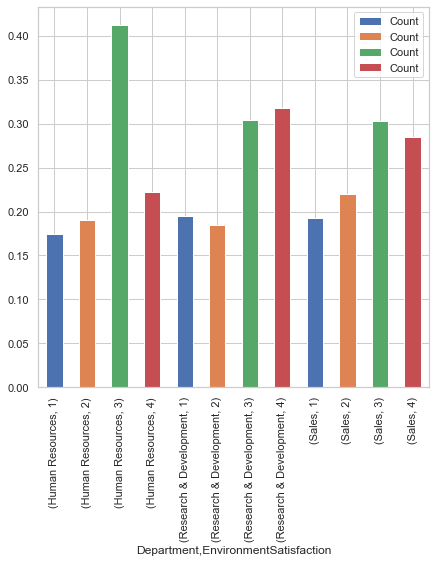

In [94]:
pd.concat(
    [du.iloc[::4], du.iloc[1::4],du.iloc[2::4],du.iloc[3::4]],
    axis=1).plot.bar(figsize=(7,7), stacked=True)

In [95]:
du=(df.groupby(["EnvironmentSatisfaction","Attrition"]).count()["Age"]/df.groupby(["EnvironmentSatisfaction"]).count()["Age"])
du=du.to_frame()
du=du.rename(columns = {'Age': 'Count'}, inplace = False)
du

Count
EnvironmentSatisfaction Attrition          
1                       No         0.746479
                        Yes        0.253521
2                       No         0.850174
                        Yes        0.149826
3                       No         0.863135
                        Yes        0.136865
4                       No         0.865471
                        Yes        0.134529

<AxesSubplot:xlabel='EnvironmentSatisfaction,Attrition'>

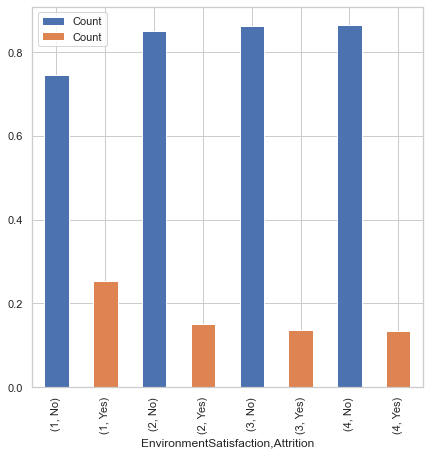

In [96]:
pd.concat(
    [du.iloc[::2], du.iloc[1::2]],
    axis=1).plot.bar(figsize=(7,7), stacked=True)

In [56]:
du=(df.groupby(["EducationField","JobRole","Attrition"]).count()["Age"]/df.groupby(["EducationField"]).count()["Age"])
du=du.to_frame()
du=du.rename(columns = {'Age': 'Count'}, inplace = False)
du

Count
EducationField   JobRole                   Attrition          
Human Resources  Human Resources           No         0.518519
                                           Yes        0.259259
                 Manager                   No         0.222222
Life Sciences    Healthcare Representative No         0.095710
                                           Yes        0.003300
...                                                        ...
Technical Degree Research Scientist        Yes        0.068182
                 Sales Executive           No         0.113636
                                           Yes        0.030303
                 Sales Representative      No         0.053030
                                           Yes        0.045455

[75 rows x 1 columns]

In [66]:
du=(df.groupby(["PercentSalaryHike","Department"]).count()["Age"]/df.groupby(["PercentSalaryHike"]).count()["Age"])
du=du.to_frame()
du=du.rename(columns = {'Age': 'Count'}, inplace = False)
du

Count
PercentSalaryHike Department                      
11                Human Resources         0.076190
                  Research & Development  0.609524
                  Sales                   0.314286
12                Human Resources         0.030303
                  Research & Development  0.646465
                  Sales                   0.323232
13                Human Resources         0.038278
                  Research & Development  0.698565
                  Sales                   0.263158
14                Human Resources         0.024876
                  Research & Development  0.626866
                  Sales                   0.348259
15                Human Resources         0.069307
                  Research & Development  0.633663
                  Sales                   0.297030
16                Human Resources         0.038462
                  Research & Development  0.679487
                  Sales                   0.282051
17                Human Resources         0.036585
                  Research & Development  0.731707
                  Sales                   0.231707
18                Human Resources         0.033708
                  Research & Development  0.595506
                  Sales                   0.370787
19                Human Resources         0.039474
                  Research & Development  0.618421
                  Sales                   0.342105
20                Research & Development  0.781818
                  Sales                   0.218182
21                Human Resources         0.125000
                  Research & Development  0.541667
                  Sales                   0.333333
22                Human Resources         0.035714
                  Research & Development  0.660714
                  Sales                   0.303571
23                Human Resources         0.035714
                  Research & Development  0.714286
                  Sales                   0.250000
24                Research & Development  0.761905
                  Sales                   0.238095
25                Research & Development  0.777778
                  Sales                   0.222222

In [111]:
new_df= pd.get_dummies(new_df, columns = ['Education'])
new_df.head()

,Age,Attrition,DistanceFromHome,EducationField,EmployeeNumber,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobRole,JobSatisfaction,...,Gender,Gender_Male,Department_Human Resources,Department_Research & Development,Department_Sales,Education_1,Education_2,Education_3,Education_4,Education_5
0,41,Yes,1,Life Sciences,1,2,3,2,Sales Executive,4,...,1,0,0,0,1,0,1,0,0,0
1,49,No,8,Life Sciences,2,3,2,2,Research Scientist,2,...,0,1,0,1,0,1,0,0,0,0
2,37,Yes,2,Other,4,4,2,1,Laboratory Technician,3,...,0,1,0,1,0,0,1,0,0,0
3,33,No,3,Life Sciences,5,4,3,1,Research Scientist,3,...,1,0,0,1,0,0,0,0,1,0
4,27,No,2,Medical,7,1,3,1,Laboratory Technician,2,...,0,1,0,1,0,1,0,0,0,0


In [98]:
# new_df=new_df.drop(columns=["Education_5",],axis=1) 
# #0000-edu_5 0001-edu_4 0010-edu-3 0100-edu_2 1000-edu_1
# new_df.head()

,Age,Attrition,DistanceFromHome,EducationField,EmployeeNumber,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobRole,JobSatisfaction,...,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Gender,Department_Human Resources,Department_Research & Development,Education_1,Education_2,Education_3,Education_4
0,41,Yes,1,Life Sciences,1,2,3,2,Sales Executive,4,...,4,0,5,1,0,0,0,1,0,0
1,49,No,8,Life Sciences,2,3,2,2,Research Scientist,2,...,7,1,7,0,0,1,1,0,0,0
2,37,Yes,2,Other,4,4,2,1,Laboratory Technician,3,...,0,0,0,0,0,1,0,1,0,0
3,33,No,3,Life Sciences,5,4,3,1,Research Scientist,3,...,7,3,0,1,0,1,0,0,0,1
4,27,No,2,Medical,7,1,3,1,Laboratory Technician,2,...,2,2,2,0,0,1,1,0,0,0


In [112]:
new_df= pd.get_dummies(new_df, columns = ['EducationField'])
new_df.head()

,Age,Attrition,DistanceFromHome,EmployeeNumber,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,...,Education_2,Education_3,Education_4,Education_5,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree
0,41,Yes,1,1,2,3,2,Sales Executive,4,Single,...,1,0,0,0,0,1,0,0,0,0
1,49,No,8,2,3,2,2,Research Scientist,2,Married,...,0,0,0,0,0,1,0,0,0,0
2,37,Yes,2,4,4,2,1,Laboratory Technician,3,Single,...,1,0,0,0,0,0,0,0,1,0
3,33,No,3,5,4,3,1,Research Scientist,3,Married,...,0,0,1,0,0,1,0,0,0,0
4,27,No,2,7,1,3,1,Laboratory Technician,2,Married,...,0,0,0,0,0,0,0,1,0,0


In [102]:
# new_df=new_df.drop(columns=["EducationField_Technical Degree",],axis=1) 
# #00000-TechnicalDegree 00001-Other 00010-Medical 00100-marketing 01000-lifeSciences 10000-hr
# new_df.head()

,Age,Attrition,DistanceFromHome,EmployeeNumber,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,...,Department_Research & Development,Education_1,Education_2,Education_3,Education_4,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other
0,41,Yes,1,1,2,3,2,Sales Executive,4,Single,...,0,0,1,0,0,0,1,0,0,0
1,49,No,8,2,3,2,2,Research Scientist,2,Married,...,1,1,0,0,0,0,1,0,0,0
2,37,Yes,2,4,4,2,1,Laboratory Technician,3,Single,...,1,0,1,0,0,0,0,0,0,1
3,33,No,3,5,4,3,1,Research Scientist,3,Married,...,1,0,0,0,1,0,1,0,0,0
4,27,No,2,7,1,3,1,Laboratory Technician,2,Married,...,1,1,0,0,0,0,0,0,1,0


In [114]:
new_df= pd.get_dummies(new_df, columns = ['Attrition'])
new_df.head()

,Age,DistanceFromHome,EmployeeNumber,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,...,Education_4,Education_5,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Attrition_No,Attrition_Yes
0,41,1,1,2,3,2,Sales Executive,4,Single,5993,...,0,0,0,1,0,0,0,0,0,1
1,49,8,2,3,2,2,Research Scientist,2,Married,5130,...,0,0,0,1,0,0,0,0,1,0
2,37,2,4,4,2,1,Laboratory Technician,3,Single,2090,...,0,0,0,0,0,0,1,0,0,1
3,33,3,5,4,3,1,Research Scientist,3,Married,2909,...,1,0,0,1,0,0,0,0,1,0
4,27,2,7,1,3,1,Laboratory Technician,2,Married,3468,...,0,0,0,0,0,1,0,0,1,0


In [117]:
new_df=new_df.drop(columns=["DistanceFromHome","EmployeeNumber","JobInvolvement","JobLevel","JobRole","JobSatisfaction","MaritalStatus","MonthlyIncome","NumCompaniesWorked","OverTime", "PercentSalaryHike", "PerformanceRating",  "RelationshipSatisfaction", "StockOptionLevel", "TotalWorkingYears",  "TrainingTimesLastYear",  "WorkLifeBalance" ,"YearsAtCompany" ,"YearsInCurrentRole" ,"YearsSinceLastPromotion" ,"YearsWithCurrManager"],axis=1)

<AxesSubplot:>

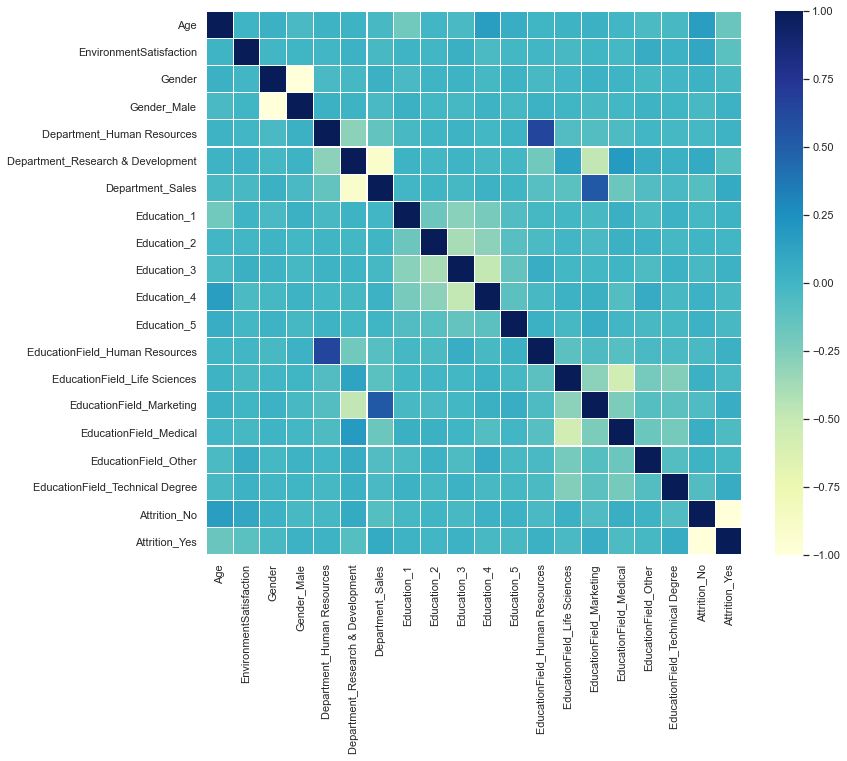

In [118]:
corrmat = new_df.corr()
  
f, ax = plt.subplots(figsize =(12, 10))
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1)